In [6]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

In [7]:
def computeCost(X, y, theta):

    m = len(y)
    J = 0

    for i in range(0, m):
        J += (X[i, :]@theta - y[i, :]) ** 2
    J /= 2*m

    return J

In [8]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros((num_iters, 1))

    for i in range(1, num_iters + 1):
        tmp_sum = 0
        for j in range(0, m):
            tmp_res = X[j, :]@theta - y[j, :]
            tmp_res = tmp_res * X[j, :]
            tmp_sum += tmp_res
        tmp_sum = (alpha/m)*tmp_sum
        for k in range(theta.shape[0]):
            theta[k, 0] -= tmp_sum[k]
        J_history[i - 1, 0] = computeCost(X, y, theta)

    return theta

In [9]:
print("Warm up excercise")
ident_matr = np.identity(5)
print(ident_matr)
input("Нажмите на любую клавишу, чтобы продолжить...")

Warm up excercise
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
Нажмите на любую клавишу, чтобы продолжить...


''

Отображение данных в виде точечного графика
Нажмите на любую клавишу, чтобы продолжить...
Выполнение градиентного спуска
Значение theta, полученное методом градиентного спуска:
 [[-3.63029144]
 [ 1.16636235]]


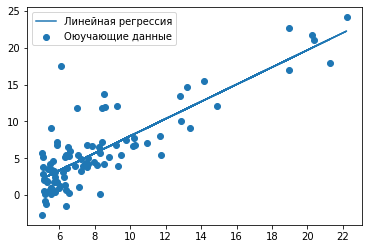

In [10]:
print("Отображение данных в виде точечного графика")
X = []
Y = []
with open('ex1data1.csv') as f:
    scv_reader = csv.reader(f, delimiter=',')
    for row in scv_reader:
        X.append([row[0]])
        Y.append([row[1]])
X = np.asarray(X).astype(np.float)
Y = np.asarray(Y).astype(np.float)

fig = plt.figure()
plt.scatter(X, Y)
ax = fig.axes[0]
plt.xticks(np.arange(0, 23, step=2))
input("Нажмите на любую клавишу, чтобы продолжить...")

print("Выполнение градиентного спуска")
ones_column = np.ones((97, 1))
X = np.hstack((ones_column, X))
theta = np.zeros((2, 1))

iterations = 1500
alpha = 0.01

theta = gradient_descent(X, Y, theta, alpha, iterations)
print("Значение theta, полученное методом градиентного спуска:\n", theta)

plt.plot(X[:, 1], X.dot(theta))
ax.legend(["Линейная регрессия", "Оюучающие данные"])
plt.show()

In [11]:
predict1 = np.array([1, 3.5]).dot(theta)
print("Для количества изделий = 35,000, предсказываем прибыль:", predict1)

predict2 = np.array([1, 7]).dot(theta)
print("Для количества изделий = 70,000, предсказываем прибыль:", predict2)

Для количества изделий = 35,000, предсказываем прибыль: [0.45197679]
Для количества изделий = 70,000, предсказываем прибыль: [4.53424501]


In [12]:
print("Визуализация J")
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.zeros((2, 1))
        t[0, 0] = theta0_vals[i]
        t[1, 0] = theta1_vals[j]
        J_vals[i, j] = computeCost(X, Y, t)

Визуализация J


Модуль mplot3d из библиотеки matplotlib отображал 3d графики некорректно, по этой причине было решено оставить отрисовку в матлабе. В ячейке ниже происходит запись нужных файлов, которые используются в скрипте draw_surf_contour.m 

In [13]:
with open("surf_data.txt", "w", newline='') as f:
    writer = csv.writer(f)
    for i in range(100):
        writer.writerow([theta0_vals[i], theta1_vals[i]])

with open('surf_values.txt', 'w', newline='') as f:
    writer = csv.writer(f)
    for i in range(100):
        row = []
        for j in range(100):
            row.append(J_vals[i, j])
        writer.writerow(row)

with open('theta_vals.txt', 'w', newline='') as f:
    writer = csv.writer(f)
    theta0 = theta.item(0)
    theta1 = theta.item(1)
    writer.writerow([theta0, theta1])